In [1]:
import sys
import os

import numpy as np
import pandas as pd
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import TwoSlopeNorm


In [2]:
import fiona

# to see if FlatGeoBuf is already supported in your Python env, if not choose the GPKG files, try with QGIS as well for fun :-)
fiona.supported_drivers

{'ARCGEN': 'r',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'rw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In [3]:
# world_countries NaturalEarth\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp
world_countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [14]:
# FlatGeoBuf is a new and very compact vector format, a little experimental and really only supported since a year or max. two
# so I provide FlatGeoBuf (fgb) and geopackage for same

# attributes:
# crossed - true/false if crossed the dateline, can't plot those correctly in most GIS tools
# area - m2
# perimeter - m2
# ipq - "standard compactness",  isoperimetric inequality (IPQ) Ossermann 1978 
# zsc - Zone standardised compactness (ZSC) - on the sphere, don't use, I left it in
# lon - longitude of cell centroid
# lat - latitude of cell centroid

print_data = [
#'DGGRID_FULLER3H_6_LAEA_step2.fgb',
'DGGRID_FULLER4D_6_LAEA_step2.fgb', # (4,5?)
'DGGRID_FULLER4T_5_LAEA_step2.fgb',
'DGGRID_FULLER7H_4_LAEA_step2.fgb',
# 'DGGRID_ISEA3H_6_LAEA_step2.fgb',
'DGGRID_ISEA4D_6_LAEA_step2.fgb',
'DGGRID_ISEA4T_5_LAEA_step2.fgb',
'DGGRID_ISEA7H_4_LAEA_step2.fgb',
# 'eaggr_ISEA3H_3_LAEA_step2.fgb', # (probably rubbish and duplicates)
'eaggr_ISEA4T_5_LAEA_step2.fgb',
'h3_3_LAEA_step2.fgb',
'rhpix_4_LAEA_step2.fgb',
's2_6_LAEA_step2.fgb'
]

# print_data = [
# 'h3_3_LAEA_step2.fgb',
# 'rhpix_4_LAEA_step2.fgb'
# ]

datafile = print_data[0]

In [21]:
def make_area_plot(grid, title, field="norm_area", vmin=None, vmax=None, vcenter=None, legend_title="normalized cell area"):
    
    
    fig, ax = plt.subplots(figsize=(10,5))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="5%", pad=0.1)

    # the vmin/vmax boundaries for all plots I have to determine based on the stats which I currently calculate
    if vmin is None:
        vmin, vmax, vcenter = grid[field].min(), grid[field].max(), np.mean([grid[field].min(), grid[field].max()])
    
    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

    # plots get messed up for dateline crossed cells
    grid.to_crs('proj=moll').plot(column=field, ax=ax, norm=norm, legend=True,cax=cax, cmap='RdYlBu_r', legend_kwds={'orientation': "horizontal"}) # 'label': legend_title,

    world_countries.boundary.to_crs('proj=moll').plot(color=None, edgecolor='black',linewidth = 0.2,ax=ax)
    ax.axis('off')
    cb_ax = fig.axes[1] 
    cb_ax.tick_params(labelsize=16)
    cb_ax.set_xlabel(xlabel=legend_title,fontsize=16)
    ax.margins(0)
    ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    plt.tight_layout()
    plt.savefig("../results_gen_bak/" + title.replace(" ", "_") + "_area_map.png", bbox_inches="tight",dpi=300)
    del(grid)

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry, norm_area]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry, norm_area]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry, norm_area]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry, norm_area]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry, norm_area]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry, norm_area]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry, norm_area]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry, norm_area]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry, norm_area]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry, norm_area]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry, norm_area]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry, norm_area]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry, norm_area]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry, norm_area]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry, norm_area]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry, norm_area]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry, norm_area]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry, norm_area]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry, norm_area]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry, norm_area]
Index: []

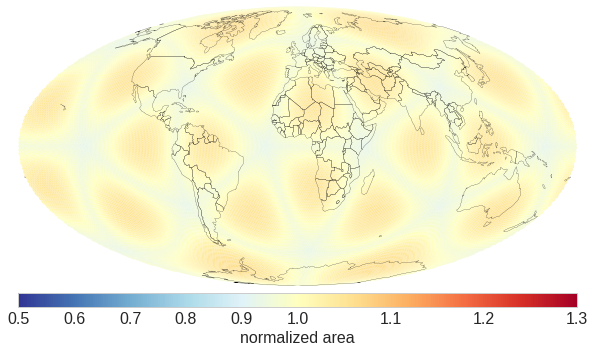

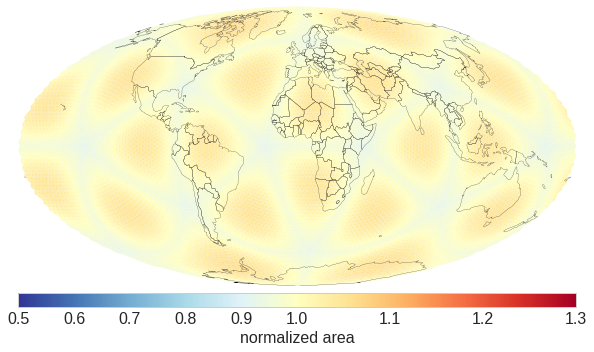

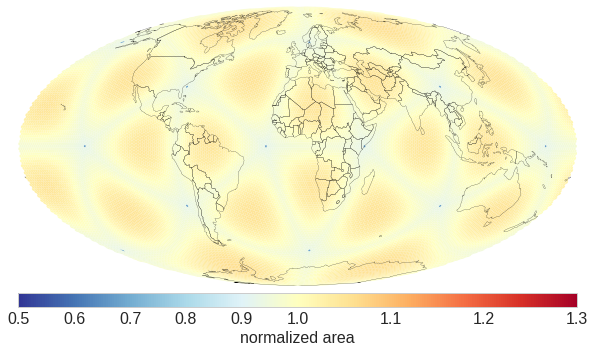

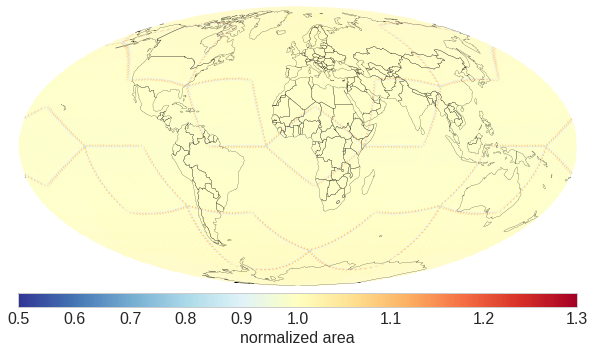

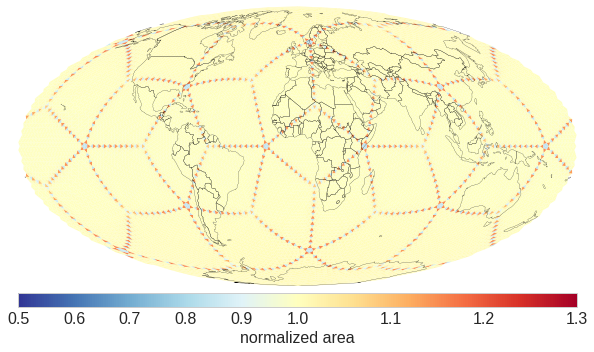

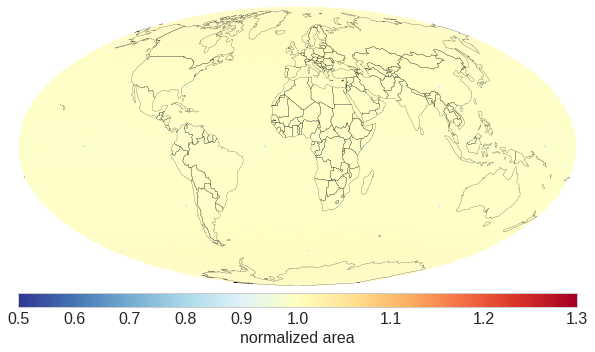

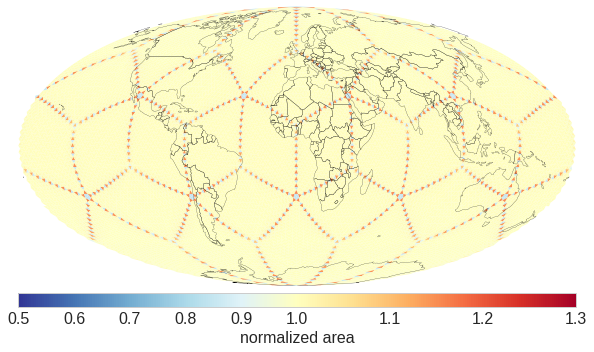

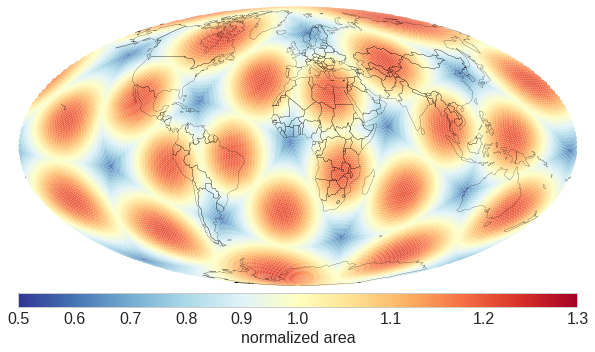

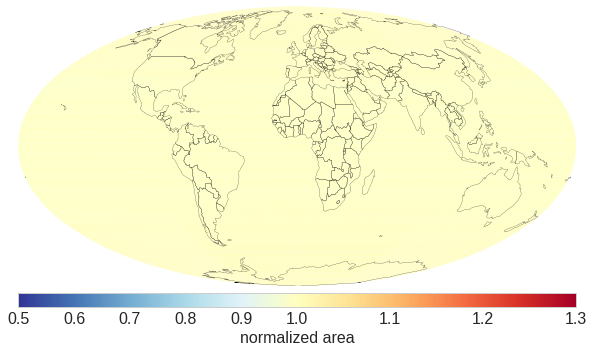

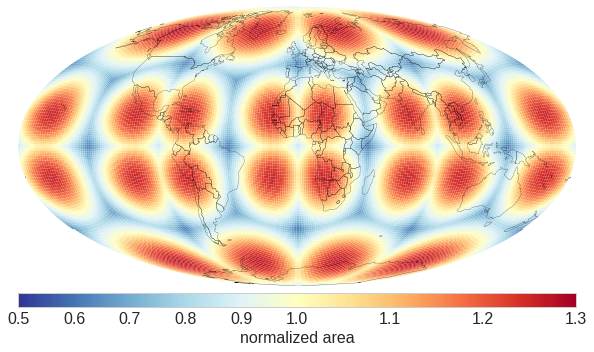

In [22]:
for datafile in print_data:
    title = " ".join(datafile.split("_")[:-3])
    grid = gpd.read_file("../results_gen_bak/" + datafile)

    # remove bogus cells for nice plotting
    grid = grid[~grid['crossed']].dropna(subset=["perimeter", "area", "ipq"])
    # grid = grid[(grid['area']>grid['area'].quantile(0.001)) & (grid['area']<grid['area'].quantile(0.999))]
    
    # for the normalised area
    grid['norm_area'] = grid['area']/grid['area'].mean()
    
    display(grid.loc[grid["norm_area"] < 0.5])
    display(grid.loc[grid["norm_area"] > 1.3])
    
    make_area_plot(grid, title.upper(), field="norm_area", vmin=0.5, vmax=1.3, vcenter = 1.0, legend_title=f"normalized area")
    

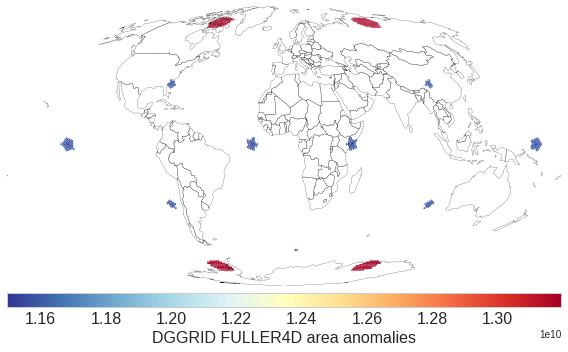

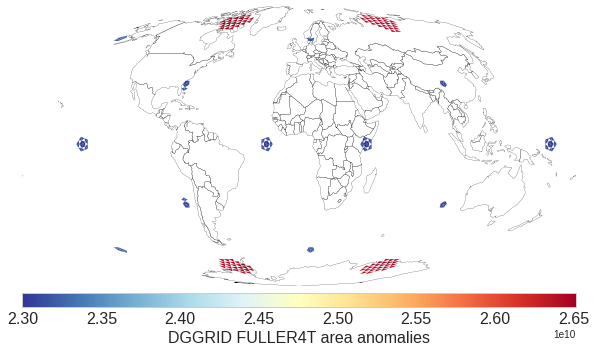

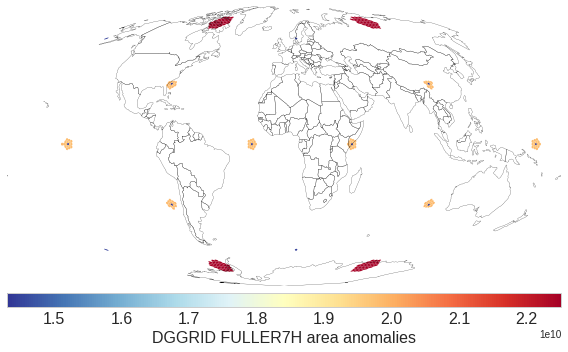

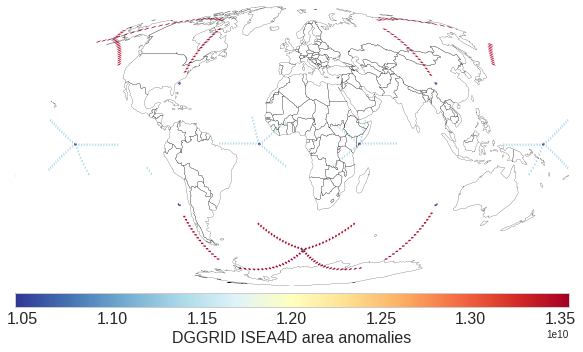

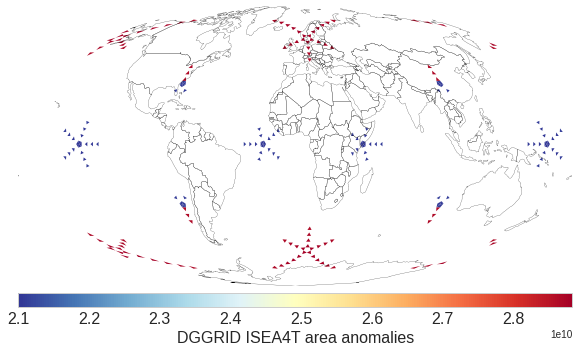

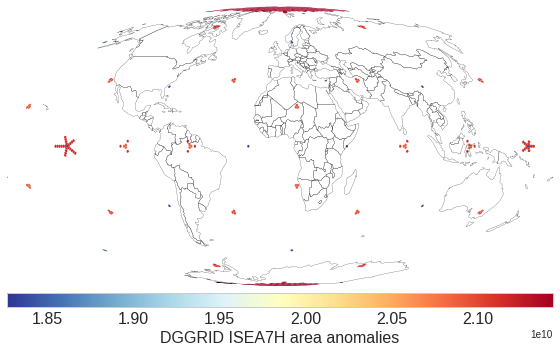

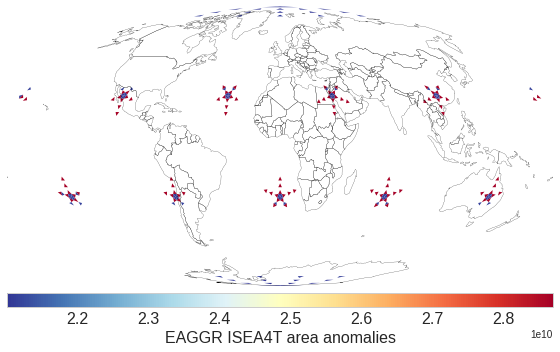

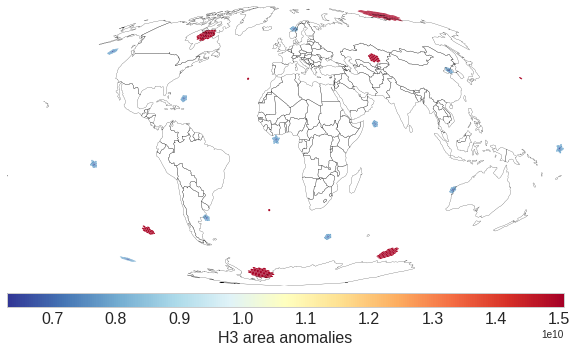

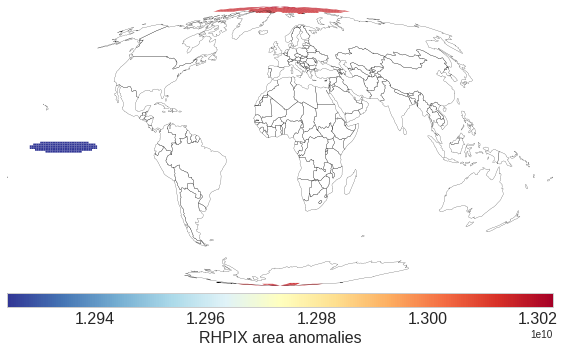

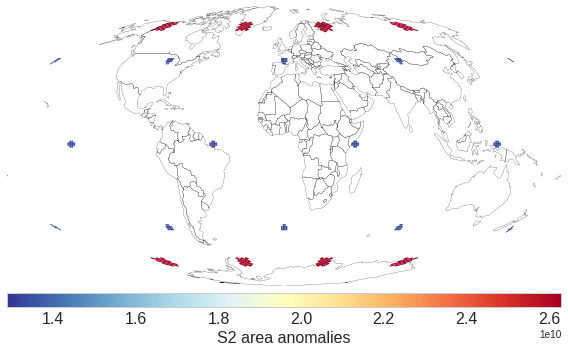

In [23]:
for datafile in print_data:
    title = " ".join(datafile.split("_")[:-3])
    grid = gpd.read_file("../results_gen_bak/" + datafile)

    # remove bogus cells for nice plotting
    grid = grid[~grid['crossed']].dropna(subset=["perimeter", "area", "ipq"])
    
    grid = grid[(grid['area']<grid['area'].quantile(0.005)) | (grid['area']>grid['area'].quantile(0.995))]
    
    
    # make_area_plot(grid, title.upper(), field="norm_area", vmin=0.5, vmax=1.3, vcenter = 1.0, legend_title=f"normalized area")
    make_area_plot(grid, title.upper() + "_anomaly", field="area", legend_title=title.upper() + " area anomalies")

In [27]:
def make_compactness_plot(grid, title, field="ipq", vmin=None, vmax=None, vcenter=None, legend_title="compactness"):
    
    
    fig, ax = plt.subplots(figsize=(10,5))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="5%", pad=0.1)

    # the vmin/vmax boundaries for all plots I have to determine based on the stats which I currently calculate
    if vmin is None:
        vmin, vmax, vcenter = grid[field].min(), grid[field].max(), np.mean([grid[field].min(), grid[field].max()])
    
    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

    # plots get messed up for dateline crossed cells
    grid.to_crs('proj=moll').plot(column=field, ax=ax, norm=norm, legend=True,cax=cax, cmap='viridis', legend_kwds={'orientation': "horizontal" }) # 'label': legend_title,

    world_countries.boundary.to_crs('proj=moll').plot(color=None, edgecolor='black',linewidth = 0.2,ax=ax)
    ax.axis('off')
    cb_ax = fig.axes[1] 
    cb_ax.tick_params(labelsize=16)
    cb_ax.set_xlabel(xlabel=legend_title,fontsize=16)
    ax.margins(0)
    ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    plt.tight_layout()
    plt.savefig("../results_gen_bak/" + title.replace(" ", "_") + "_compactness_map.png", bbox_inches="tight",dpi=300)
    del(grid)

'DGGRID FULLER4D'

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry]
Index: []

'DGGRID FULLER4T'

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry]
Index: []

'DGGRID FULLER7H'

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry]
Index: []

'DGGRID ISEA4D'

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry]
Index: []

'DGGRID ISEA4T'

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry]
Index: []

'DGGRID ISEA7H'

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry]
Index: []

'eaggr ISEA4T'

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry]
Index: []

'h3'

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry]
Index: []

'rhpix'

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry]
Index: []

's2'

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry]
Index: []

Empty GeoDataFrame
Columns: [cell_id, crossed, area, perimeter, ipq, zsc, lon, lat, geometry]
Index: []

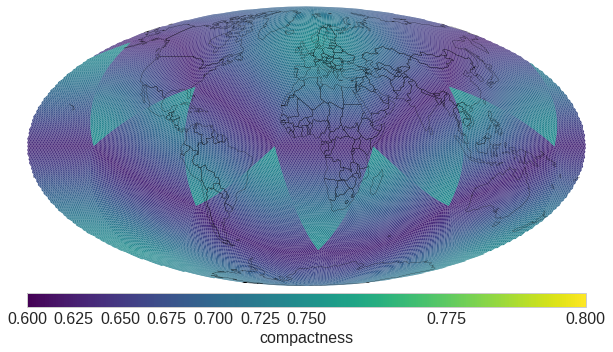

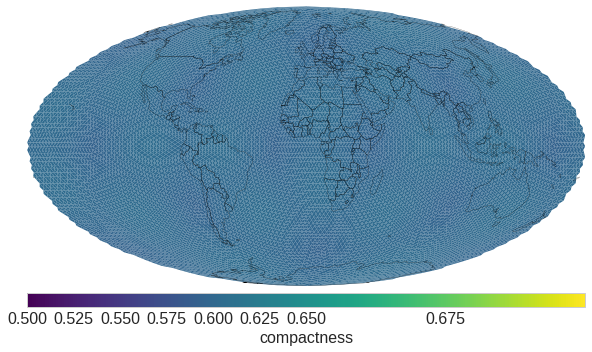

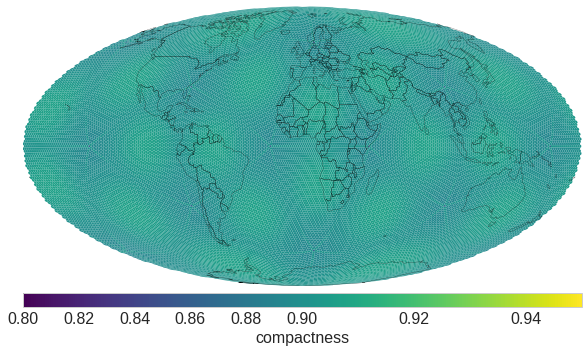

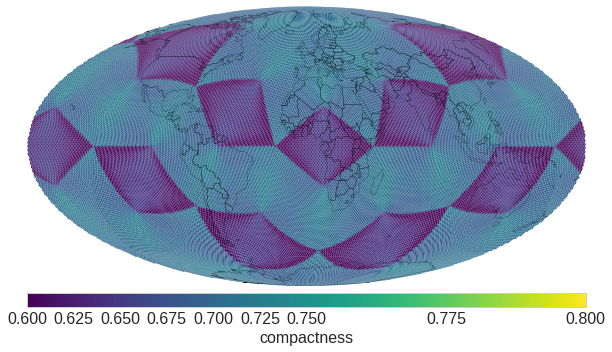

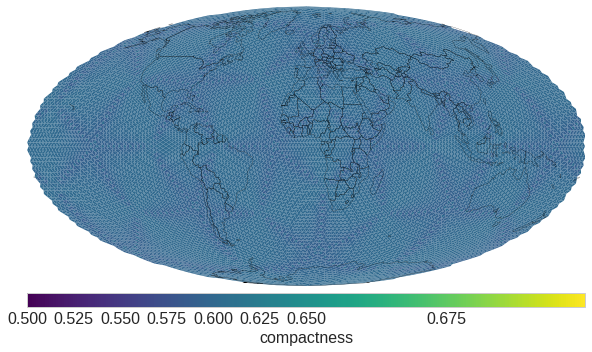

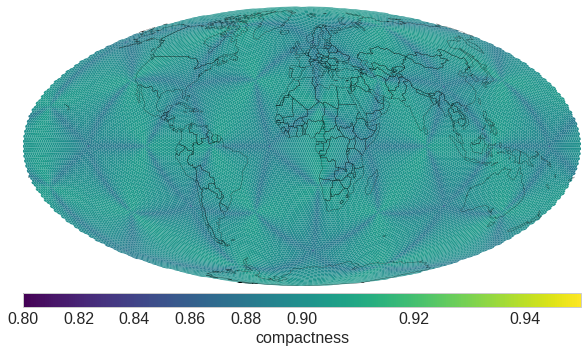

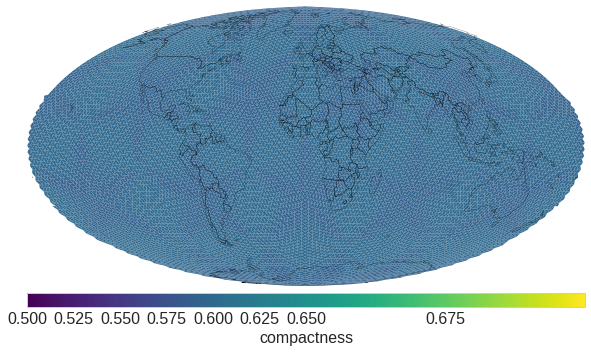

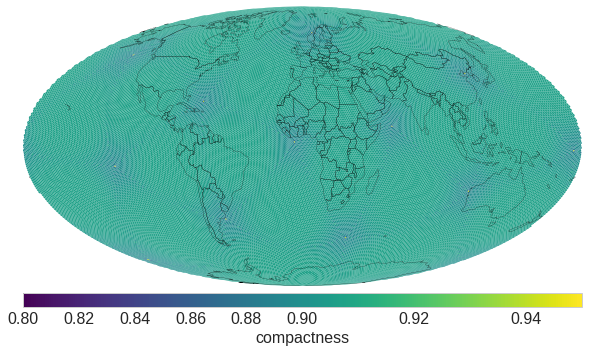

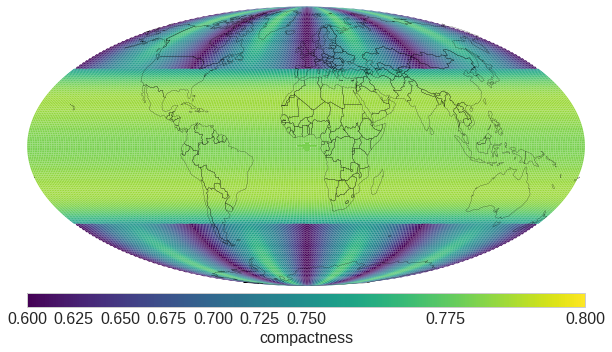

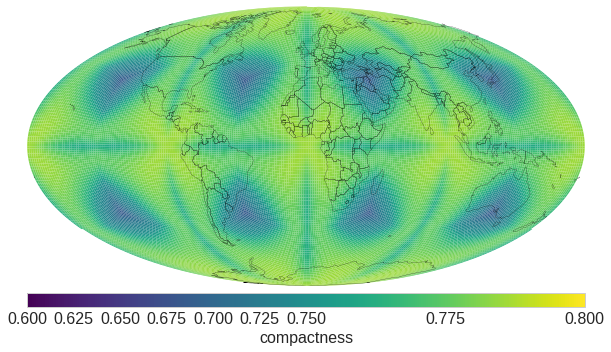

In [28]:
# min/max for compactness
# 0.8 - 1.0
g_high = ['DGGRID_FULLER3H', 'DGGRID_FULLER7H', 'DGGRID_ISEA3H','DGGRID_ISEA7H','H3']

# 0.6 - 0.8
g_low = [ 'DGGRID_FULLER4D','DGGRID_ISEA4D',  'RHPIX', 'S2']

# 0.5 - 0.7
g_very_low = [ 'DGGRID_FULLER4T', 'DGGRID_ISEA4T',  'EAGGR_ISEA4T' ]

for datafile in print_data:
    title = " ".join(datafile.split("_")[:-3])
    grid = gpd.read_file("../results_gen_bak/" + datafile)

    # remove bogus cells for nice plotting
    grid = grid[~grid['crossed']].dropna(subset=["perimeter", "area", "ipq"])
    # grid = grid[(grid['area']>grid['area'].quantile(0.001)) & (grid['area']<grid['area'].quantile(0.999))]
    
    display(title)
    display(grid.loc[grid["ipq"] < 0.4])
    display(grid.loc[grid["ipq"] > 1.0])
    
    vmin=0.4
    vmax=1.0
    vcenter = 0.9
    
    if title.replace(" ", "_").upper() in g_high:
        vmin=0.8
        vmax=0.95
        vcenter = 0.9
    elif title.replace(" ", "_").upper() in g_low:
        vmin=0.6
        vmax=0.8
        vcenter = 0.75
    else:
        vmin=0.5
        vmax=0.7
        vcenter = 0.65
    make_compactness_plot(grid, title.upper(), field="ipq", vmin=vmin, vmax=vmax, vcenter = vcenter, legend_title="compactness")

In [29]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
import numpy as np

def find_nearest(array, value, as_idx=False):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    if as_idx:
        return idx
    else:
        return array[idx]
    
def make_area_hist(grid, title, field="norm_area", vmin=None, vmax=None, vcenter=None, legend_title="normalized cell area"):

    # the normalised area histograms
    fig, ax = plt.subplots(figsize=(11,8))

    # there are outliers, presumably from wrong calculation for dateline crossed cells
    patches = plt.hist(data=grid,x=field, bins=60, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
    plt.style.use('seaborn-whitegrid')

    n, bins, patches = plt.hist(data=grid,x=field, bins=60, edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

    n = n.astype('int') # it MUST be integer

    bin_df = pd.DataFrame({ "bin_vals": np.abs(1-bins)})
    min_idx = bin_df.loc[bin_df["bin_vals"] == bin_df["bin_vals"].min()].index[0]

    if vmin is None:
        vmin = grid[field].min()
    if vmax is None:
        vmax = grid[field].max()
    if vcenter is None:
        vcenter = np.mean([vmin, vmax])
    
    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

    spec_cmap = cm.get_cmap('RdYlBu_r', len(n))
    norm_cmap = spec_cmap(norm(np.linspace(vmin, vmax, len(n))))

    a_vmin = bins.min()
    a_vmax = bins.max()
    # print(a_vmin)
    # print(a_vmax)

    syn_list = np.linspace(vmin, vmax, len(n))

    # print(syn_list)

    cut_vmin = find_nearest(syn_list, a_vmin, as_idx=True)
    cut_vmax = find_nearest(syn_list, a_vmax, as_idx=True)

    # print(cut_vmin)
    # print(cut_vmax)

    act_list = np.linspace(cut_vmin, cut_vmax, len(n)).astype(int)
    # print(act_list)

    # Good old loop. Choose colormap of your taste
    # spec_cmap(  bins[i] / max(bins))
    for i in range(len(patches)):
        patches[i].set_facecolor(norm_cmap[act_list[i]])
    # Make one bin stand out   
    patches[min_idx].set_fc('red') # Set color
    patches[min_idx].set_alpha(0.8) # Set opacity

    # Add annotation
    # plt.annotate('no distortion', xy=(1.0, 1300), xytext=(1.1, 1500), fontsize=12, arrowprops={'width':0.3,'headwidth':6,'color':'#333333'})
    #plt.title(title') 

    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.xlabel(title + " " + legend_title, fontsize=18) 
    plt.ylabel('No# of cells', fontsize=18) 
    plt.tight_layout()
    plt.savefig("../results_gen_bak/" + title.replace(" ", "_") + "_area_hist.png", bbox_inches="tight",dpi=300)
    del(grid)
    

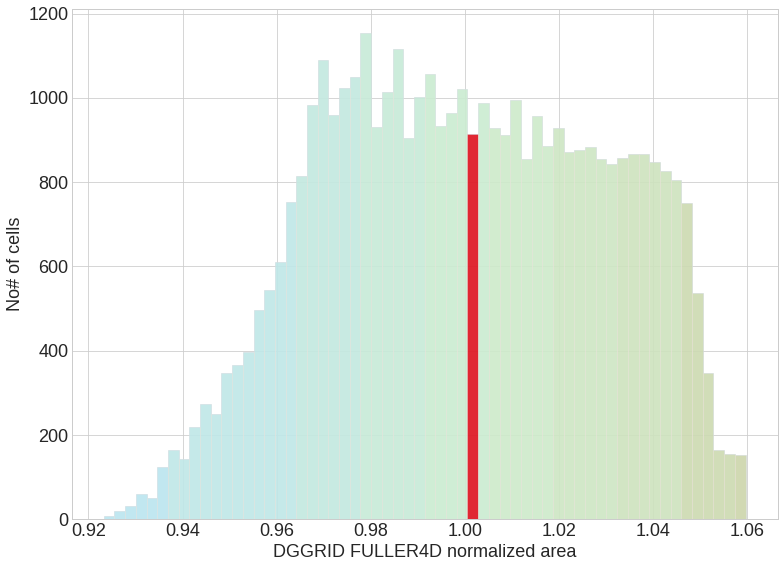

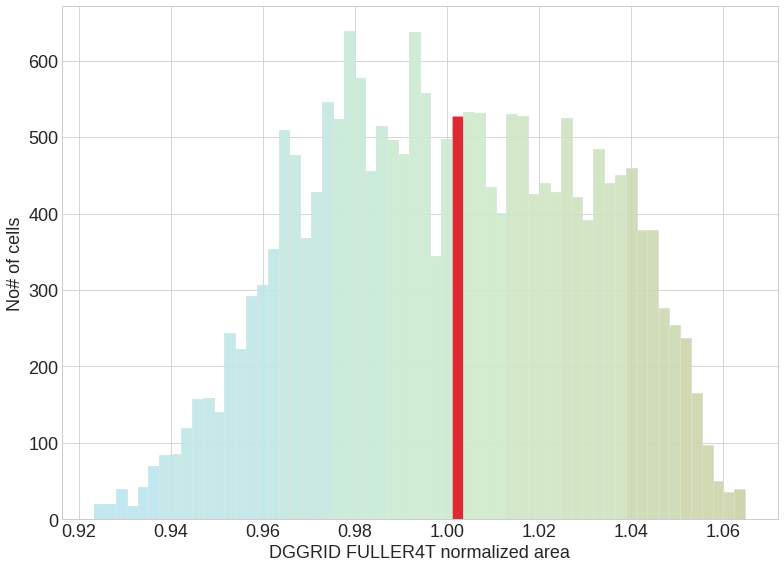

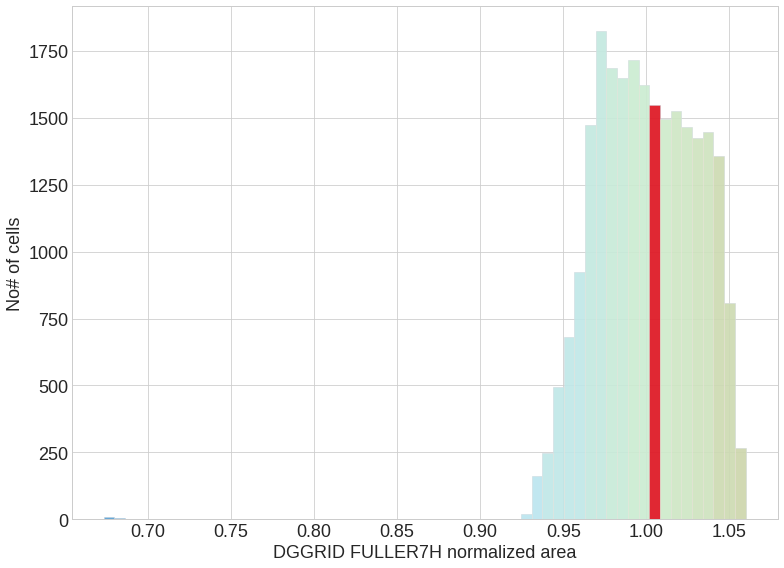

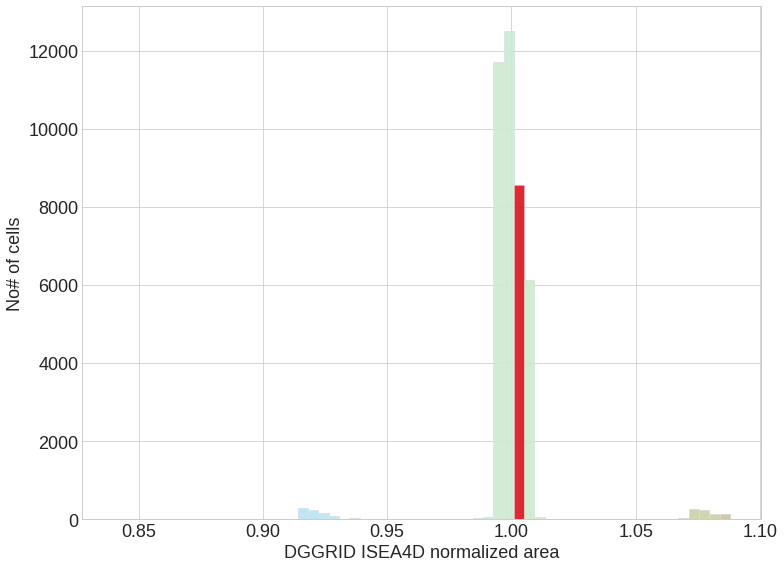

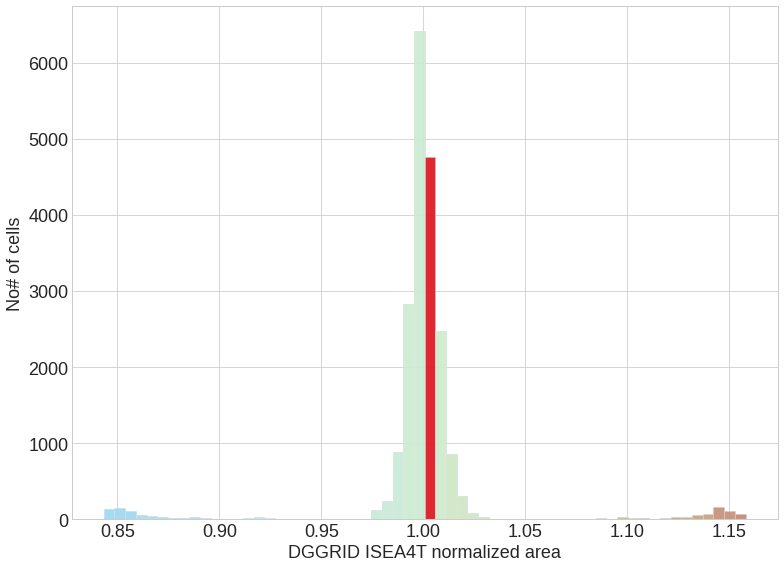

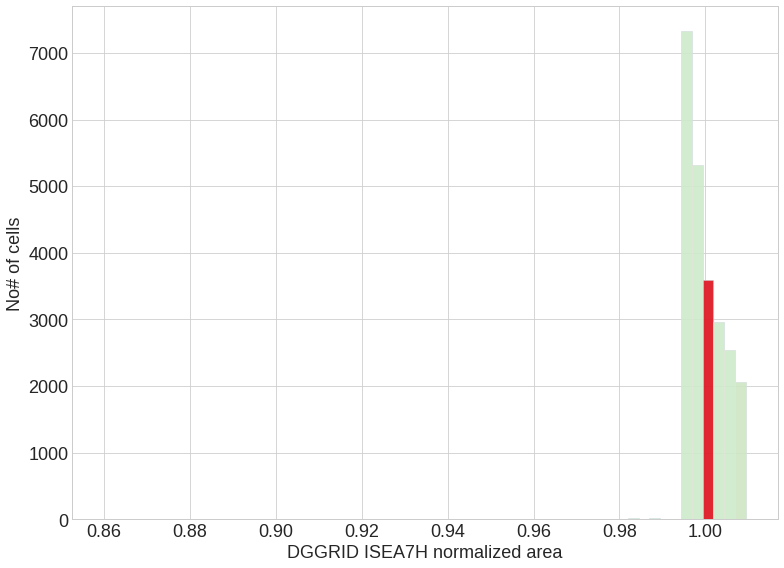

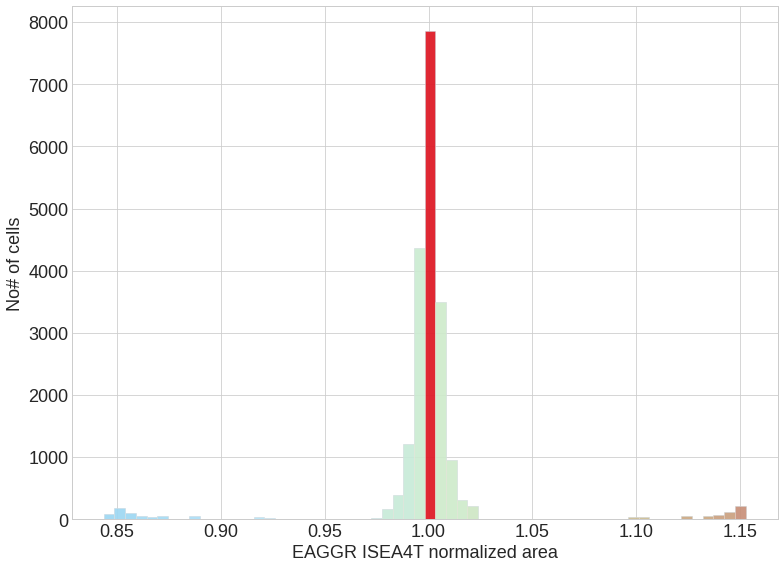

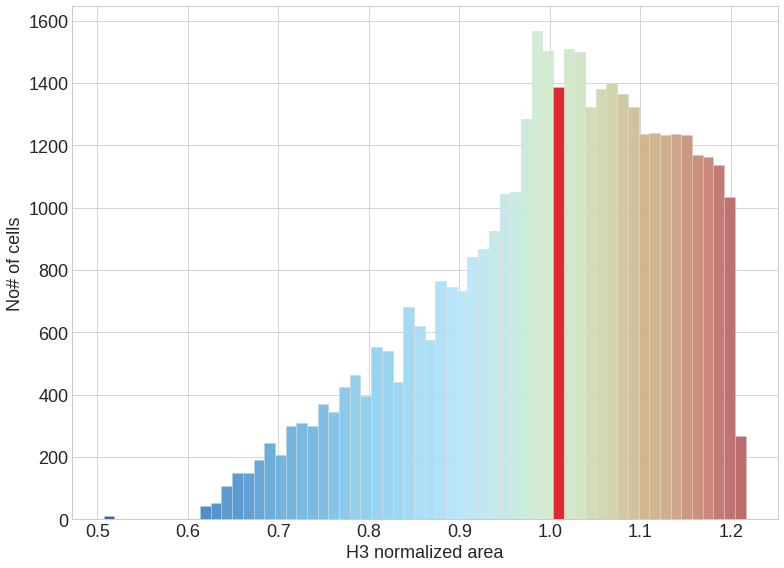

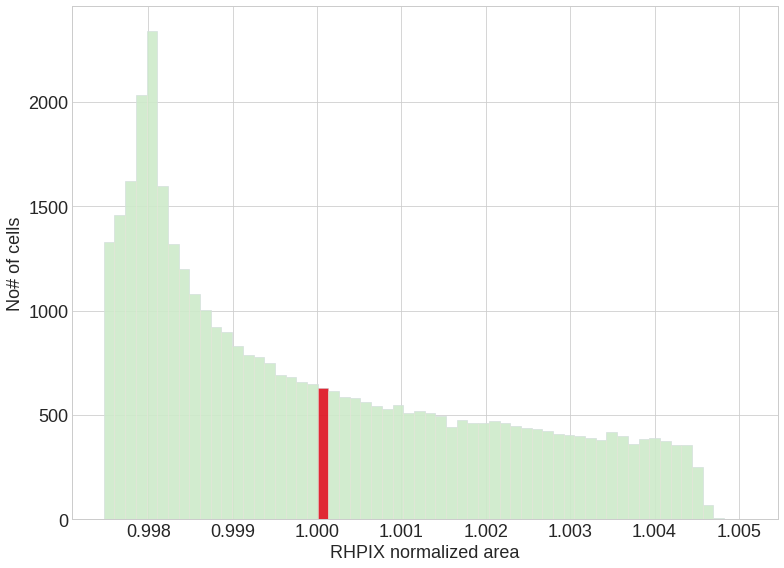

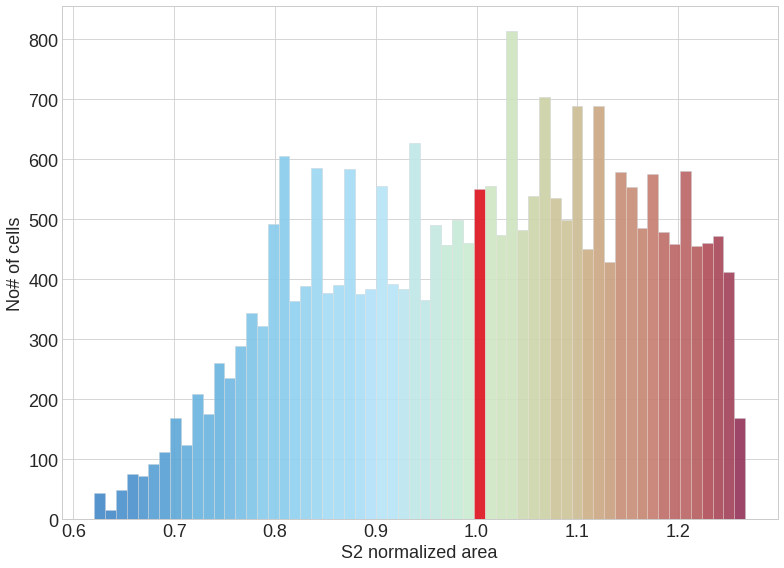

In [30]:
for datafile in print_data:
    title = " ".join(datafile.split("_")[:-3])
    grid = gpd.read_file("../results_gen_bak/" + datafile)

    # remove bogus cells for nice plotting
    grid = grid[~grid['crossed']].dropna(subset=["perimeter", "area", "ipq"])
    # grid = grid[(grid['area']>grid['area'].quantile(0.001)) & (grid['area']<grid['area'].quantile(0.999))]
    
    # for the normalised area
    grid['norm_area'] = grid['area']/grid['area'].mean()
    
    # display(grid.loc[grid["norm_area"] < 0.5])
    # display(grid.loc[grid["norm_area"] > 1.3])
    
    # make_area_hist(grid, title.upper(), field="norm_area", legend_title=f"normalized area")
    make_area_hist(grid, title.upper(), field="norm_area", vmin=0.5, vmax=1.3, vcenter = 1.0, legend_title=f"normalized area")
    

In [31]:
def make_compactness_hist(grid, title, field="ipq", vmin=None, vmax=None, vcenter=None, legend_title="compactness"):

    # the normalised area histograms
    fig, ax = plt.subplots(figsize=(11,8))

    # there are outliers, presumably from wrong calculation for dateline crossed cells
    patches = plt.hist(data=grid,x=field, bins=60, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
    plt.style.use('seaborn-whitegrid')

    n, bins, patches = plt.hist(data=grid,x=field, bins=60, edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

    n = n.astype('int') # it MUST be integer

    bin_df = pd.DataFrame({ "bin_vals": np.abs(1-bins)})
    min_idx = bin_df.loc[bin_df["bin_vals"] == bin_df["bin_vals"].min()].index[0]

    if vmin is None:
        vmin = grid[field].min()
    if vmax is None:
        vmax = grid[field].max()
    if vcenter is None:
        vcenter = np.mean([vmin, vmax])
    
    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

    spec_cmap = cm.get_cmap('viridis', len(n))
    norm_cmap = spec_cmap(norm(np.linspace(vmin, vmax, len(n))))

    a_vmin = bins.min()
    a_vmax = bins.max()
    # print(a_vmin)
    # print(a_vmax)

    syn_list = np.linspace(vmin, vmax, len(n))

    # print(syn_list)

    cut_vmin = find_nearest(syn_list, a_vmin, as_idx=True)
    cut_vmax = find_nearest(syn_list, a_vmax, as_idx=True)

    # print(cut_vmin)
    # print(cut_vmax)

    act_list = np.linspace(cut_vmin, cut_vmax, len(n)).astype(int)
    # print(act_list)

    # Good old loop. Choose colormap of your taste
    # spec_cmap(  bins[i] / max(bins))
    for i in range(len(patches)):
        patches[i].set_facecolor(norm_cmap[act_list[i]])
    # Make one bin stand out   
    # patches[min_idx].set_fc('red') # Set color
    # patches[min_idx].set_alpha(0.8) # Set opacity

    # Add annotation
    # plt.annotate('no distortion', xy=(1.0, 1300), xytext=(1.1, 1500), fontsize=12, arrowprops={'width':0.3,'headwidth':6,'color':'#333333'})
    #plt.title(title') 

    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.xlabel(title + " " + legend_title, fontsize=18) 
    plt.ylabel('No# of cells', fontsize=18) 
    plt.tight_layout()
    plt.savefig("../results_gen_bak/" + title.replace(" ", "_") + "_compactness_hist.png", bbox_inches="tight",dpi=300)
    del(grid)

'DGGRID FULLER4D'

'DGGRID FULLER4T'

'DGGRID FULLER7H'

'DGGRID ISEA4D'

'DGGRID ISEA4T'

'DGGRID ISEA7H'

'eaggr ISEA4T'

'h3'

'rhpix'

's2'

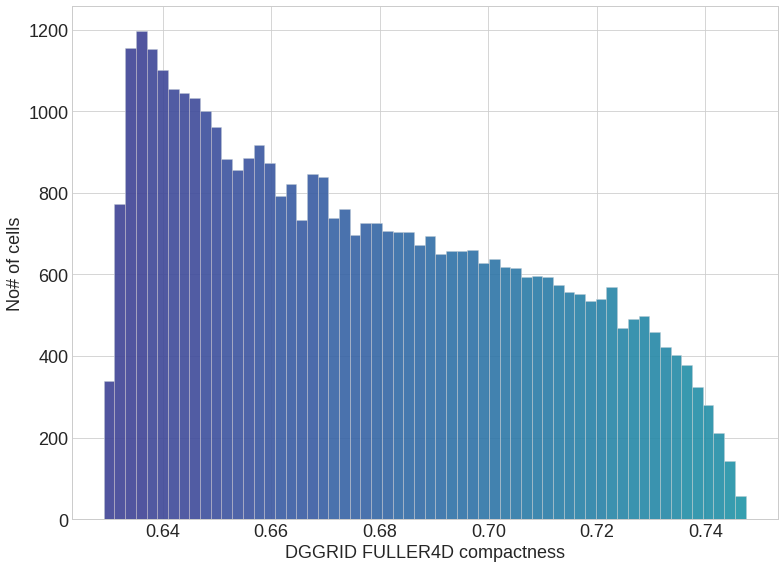

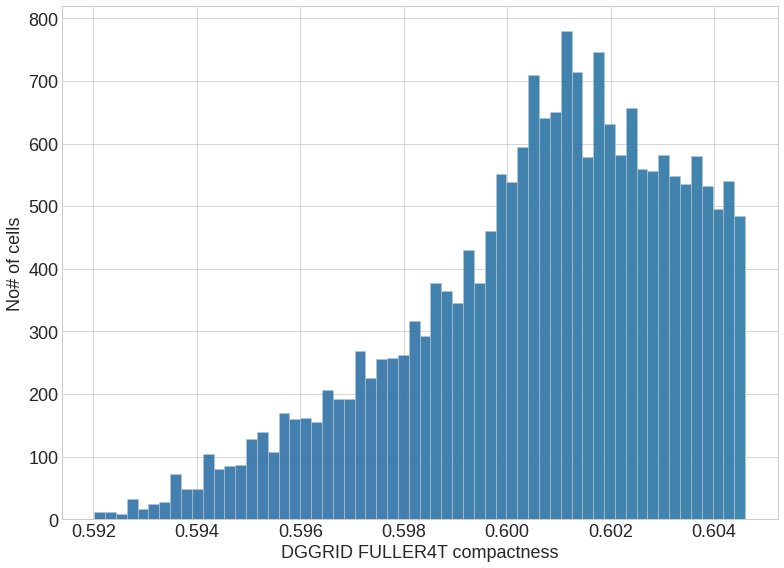

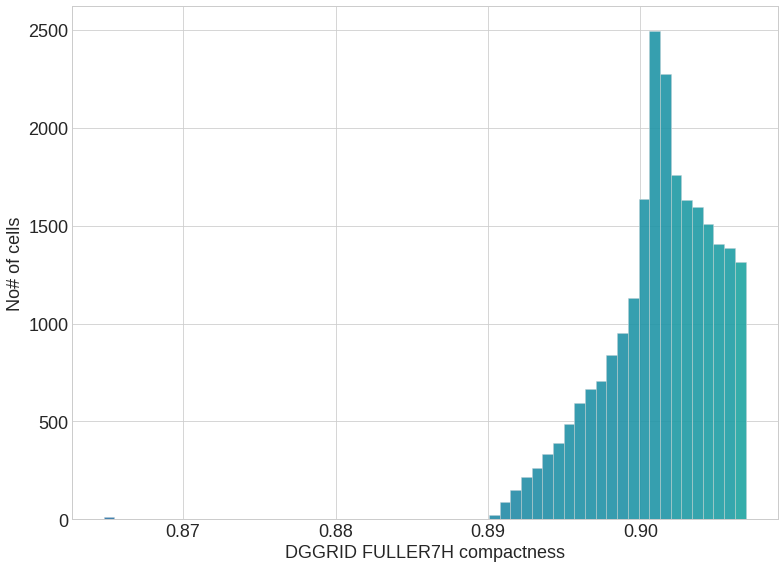

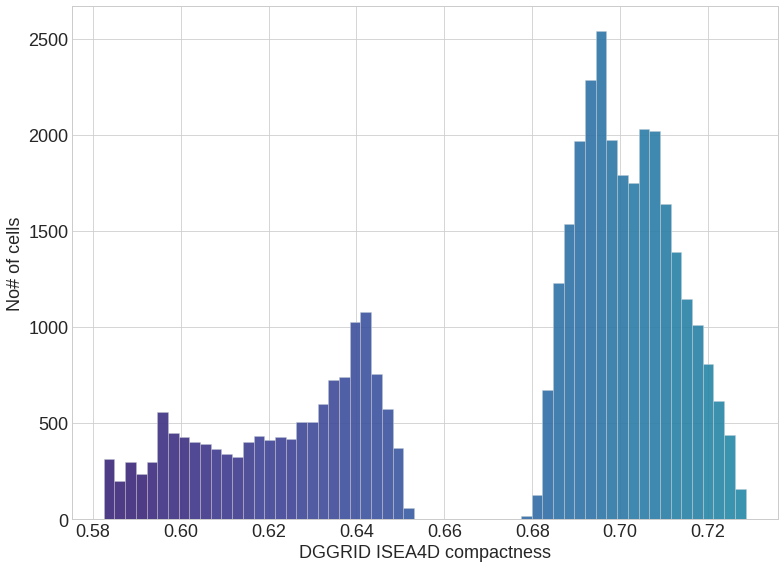

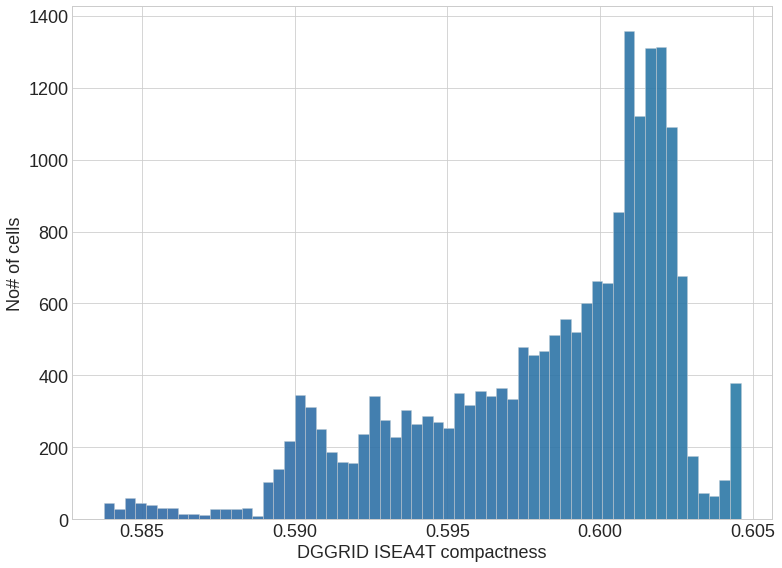

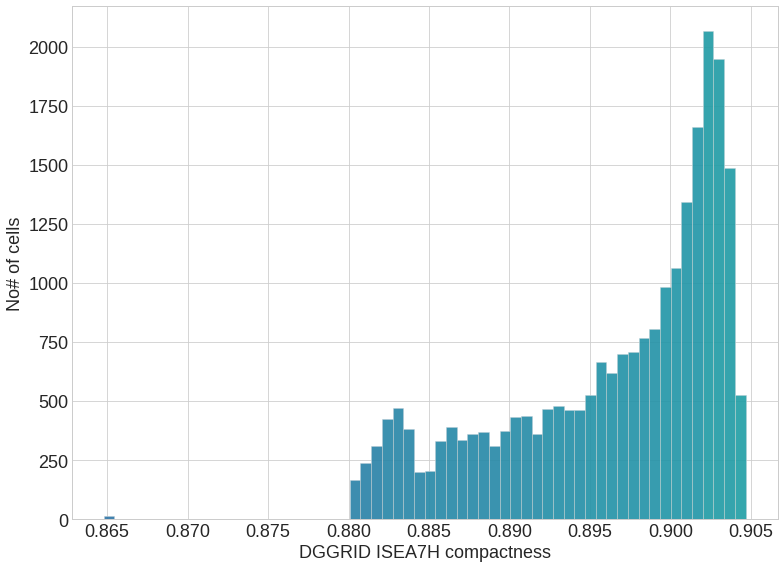

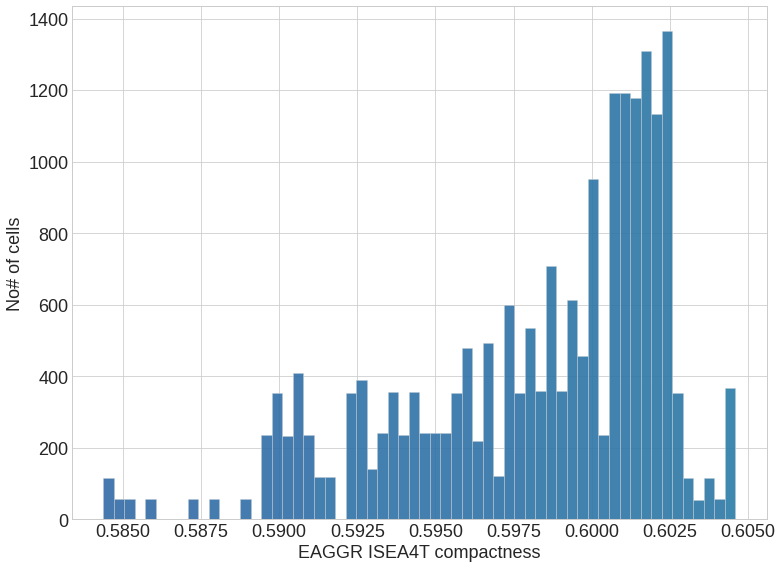

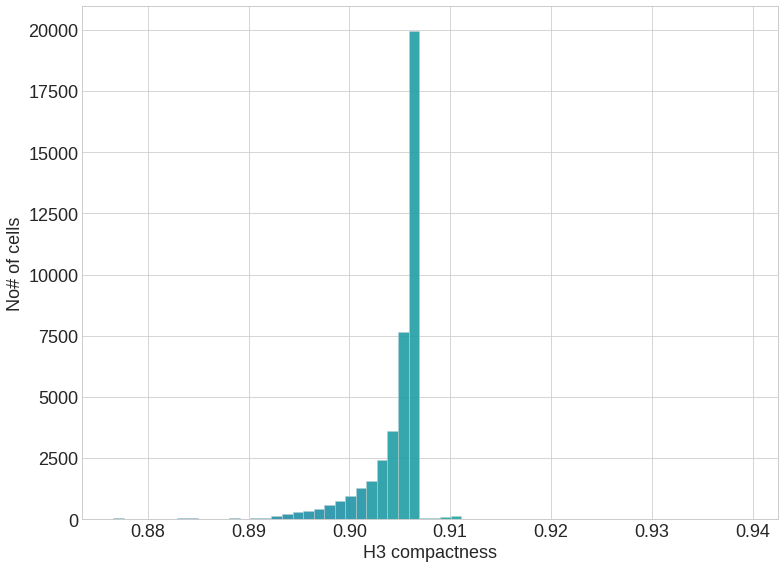

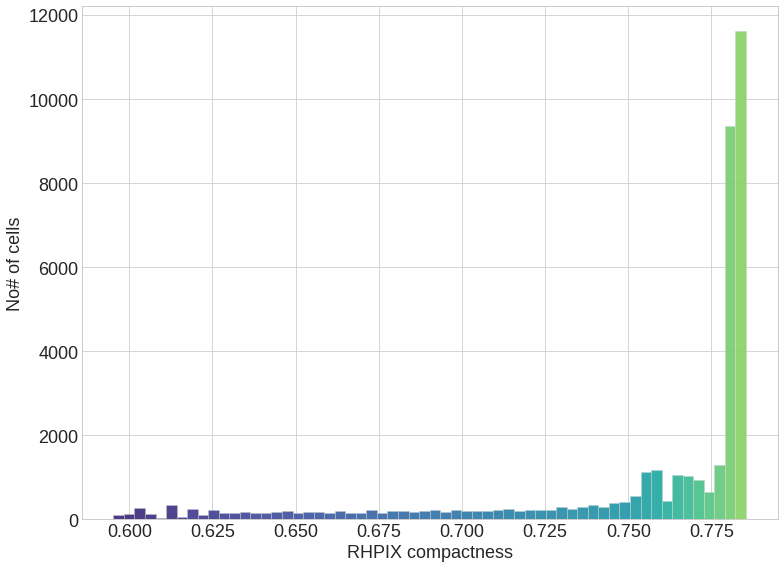

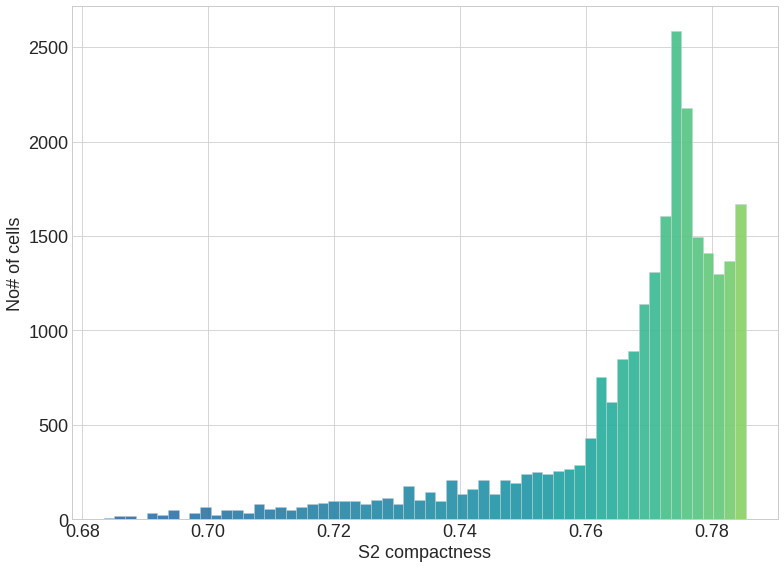

In [32]:
# min/max for compactness
# 0.8 - 1.0
g_high = ['DGGRID_FULLER3H', 'DGGRID_FULLER7H', 'DGGRID_ISEA3H','DGGRID_ISEA7H','H3']

# 0.6 - 0.8
g_low = [ 'DGGRID_FULLER4D','DGGRID_ISEA4D',  'RHPIX', 'S2']

# 0.5 - 0.7
g_very_low = [ 'DGGRID_FULLER4T', 'DGGRID_ISEA4T',  'EAGGR_ISEA4T' ]

for datafile in print_data:
    title = " ".join(datafile.split("_")[:-3])
    grid = gpd.read_file("../results_gen_bak/" + datafile)

    # remove bogus cells for nice plotting
    grid = grid[~grid['crossed']].dropna(subset=["perimeter", "area", "ipq"])
    # grid = grid[(grid['area']>grid['area'].quantile(0.001)) & (grid['area']<grid['area'].quantile(0.999))]
    
    display(title)
    # display(grid.loc[grid["ipq"] < 0.4])
    # display(grid.loc[grid["ipq"] > 1.0])
    
    vmin=0.4
    vmax=1.0
    vcenter = 0.9
    
    if title.replace(" ", "_").upper() in g_high:
        vmin=0.8
        vmax=0.95
        vcenter = 0.9
    elif title.replace(" ", "_").upper() in g_low:
        vmin=0.6
        vmax=0.8
        vcenter = 0.75
    else:
        vmin=0.5
        vmax=0.7
        vcenter = 0.65
    
    make_compactness_hist(grid, title.upper(), field="ipq", vmin=vmin, vmax=vmax, vcenter = vcenter, legend_title="compactness")
    